In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [3]:
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [30]:
data.Age.fillna(data['Age'].mean(), inplace=True)
data['Cabin'].fillna('N', inplace=True)
data['Embarked'].fillna('N', inplace=True)

print('# of null', data.isnull().sum().sum())

# of null 0


In [81]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [12]:
def encode_feature(df) :
    features = ['Cabin','Sex','Embarked']
    
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(df.loc[:,feature])
        df.loc[:,feature] = le.transform(df.loc[:,feature])
        
    return(df)

In [21]:
data = encode_feature(data)
data.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.0,1,0,7.2500,7,3
1,1,1,0,38.0,1,0,71.2833,2,0


In [3]:
def titanic_fillna(df) :
    df.Age.fillna(data['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return(df)

In [4]:
def drop_feature(df) :
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

In [5]:
# 전처리 기본 2 : lambda 이용해서 Cabin의 값 1글자만 사용
def format_features(df) :
    df.loc[:,'Cabin'] = df.loc[:,'Cabin'].apply(lambda x : str(x)[:1])
    
    features = ['Cabin','Sex','Embarked']
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(df.loc[:,feature])
        df.loc[:,feature] = le.transform(df.loc[:,feature])
        
    return(df)
    

In [6]:
def titanic_transform(df) :
    df = titanic_fillna(df)
    df = drop_feature(df)
    df = format_features(df)
    return(df)

In [10]:
data_train = titanic_transform(data)

In [11]:
y_titanic_train = data_train.loc[:,'Survived']
X_titanic_train = data_train.drop('Survived',axis=1)

In [49]:
X_titanic_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,1,22.0,1,0,7.2500,7,3
1,1,0,38.0,1,0,71.2833,2,0


In [97]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, y_titanic_train, test_size=0.2,
                                                    random_state=11)

In [52]:
y_titanic_train.value_counts() / len(y_titanic_train)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

In [53]:
y_train.value_counts()/len(y_train)

0    0.605337
1    0.394663
Name: Survived, dtype: float64

In [54]:
y_test.value_counts()/len(y_test)

0    0.659218
1    0.340782
Name: Survived, dtype: float64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, y_titanic_train,
                                                    stratify = y_titanic_train,
                                                    test_size=0.2,
                                                    random_state=11)

In [ ]:
# 정답 비율 유지하게 나눠서 해줌
# 타겟뿐만 아니라 피쳐에 대해서만 가능함

In [56]:
y_train.value_counts()/len(y_train) # 엇비슷하게 짤라줌

0    0.616573
1    0.383427
Name: Survived, dtype: float64

In [57]:
y_test.value_counts()/len(y_test)

0    0.614525
1    0.385475
Name: Survived, dtype: float64

In [93]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [94]:
from sklearn.neighbors import KNeighborsClassifier

In [95]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import cross_val_score

In [96]:
from sklearn.svm import SVC

In [69]:
knn = KNeighborsClassifier()

In [70]:
scores = cross_val_score(knn, X_train, y_train, cv=5)
for iter_count, accuracy in enumerate(scores) :
    print('knn 교차검증 {0} & 정확도 {1:.4f}'.format(iter_count, accuracy))
print('---------------------------------------------------------')
print('knn 교차검증 평균 정확도 : {0:.4f}'.format(scores.mean()))

knn 교차검증 0 & 정확도 0.7413
knn 교차검증 1 & 정확도 0.6853
knn 교차검증 2 & 정확도 0.7483
knn 교차검증 3 & 정확도 0.7676
knn 교차검증 4 & 정확도 0.7376
---------------------------------------------------------
knn 교차검증 평균 정확도 : 0.7360


In [ ]:
# base 라인 확인

In [71]:
parameters = {
    'n_neighbors':[1,3,5,7],
    'weights':['uniform']
}

In [72]:
n_iter_search=10
knn_rgs = RandomizedSearchCV(knn, param_distributions=parameters, cv=7,
                            scoring='accuracy', n_jobs=-1,
                            verbose=1,random_state=1234,
                            n_iter=n_iter_search)
knn_rgs.fit(X_train, y_train)

# verbos = 로그를 어느단계까지 찍나

C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:266: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 7 folds for each of 4 candidates, totalling 28 fits


[Parallel(n_jobs=-1)]: Done  28 out of  28 | elapsed:    2.0s finished


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 3, 5, 7],
                                        'weights': ['uniform']},
                   pre_dispatch='2*n_jobs', random_state=1234, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [73]:
# best 모델 기준으로 가장 베스트 파라미터값에 대해서 확인해야함

knn_rgs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
parameters = {
    'n_neighbors':[3,5,7],
    'weights':['uniform']
}

In [75]:
n_iter_search=10
grid_knn_clf = GridSearchCV(knn, param_grid=parameters, cv=7,
                            scoring='accuracy', n_jobs=-1)

grid_knn_clf.fit(X_train, y_train)

# verbos = 로그를 어느단계까지 찍나

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'weights': ['uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [76]:
grid_knn_clf.best_params_
# 지정했던 것에 대한 정보만 줌

{'n_neighbors': 5, 'weights': 'uniform'}

In [77]:
grid_knn_clf.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [78]:
grid_knn_clf.best_score_

0.7289325842696629

In [79]:
# 학습과정이 끝난 애를 기준으로 knn_best에다가 저장함
knn_best = grid_knn_clf.best_estimator_

knn_predictions = knn_best.predict(X_test)
accuracy = accuracy_score(y_test,knn_predictions)
print('knn에서 GridSearchCV로 찾은 결과 : {0:.4f}'.format(accuracy))

knn에서 GridSearchCV로 찾은 결과 : 0.7318


In [ ]:
# 최적화를 했기때문에 hyper parameter tunning을 완료했음.

In [45]:
X_train.shape

(712, 8)

In [ ]:
# RandomForest 했을때 

In [26]:
rfc = RandomForestClassifier()

In [84]:
scores = cross_val_score(rfc, X_train, y_train, cv=5)
for iter_count, accuracy in enumerate(scores) :
    print('rfc 교차검증 {0} & 정확도 {1:.4f}'.format(iter_count, accuracy))
print('---------------------------------------------------------')
print('rfc 교차검증 평균 정확도 : {0:.4f}'.format(scores.mean()))

rfc 교차검증 0 & 정확도 0.7972
rfc 교차검증 1 & 정확도 0.7483
rfc 교차검증 2 & 정확도 0.8252
rfc 교차검증 3 & 정확도 0.8028
rfc 교차검증 4 & 정확도 0.7872
---------------------------------------------------------
rfc 교차검증 평균 정확도 : 0.7921


C:\dev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_est

In [60]:
parameters = {
    'n_estimators':np.arange(10,110,10),
    'max_features':np.arange(1,8),
    'min_samples_split':np.arange(2,5),
    'max_leaf_nodes':np.arange(2,15)
}

In [61]:
n_iter_search=10
rfc_rgs = RandomizedSearchCV(rfc, param_distributions=parameters, cv=7,
                            scoring='accuracy', n_jobs=-1,
                            verbose=1,random_state=1234,
                            n_iter=n_iter_search)
rfc_rgs.fit(X_train, y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.5s finished


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [62]:
rfc_rgs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=90,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
parameters = {
    'n_estimators':np.arange(40,60),
    'max_features':np.arange(1,3),
    'min_samples_split':np.arange(2,5),
    'max_leaf_nodes':np.arange(10,15)
}

In [64]:
n_iter_search=10
grid_rfc_clf = GridSearchCV(rfc, param_grid=parameters, cv=7,
                            scoring='accuracy', n_jobs=-1)

grid_rfc_clf.fit(X_train, y_train)

GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [65]:
grid_rfc_clf.best_params_

{'max_features': 2,
 'max_leaf_nodes': 14,
 'min_samples_split': 2,
 'n_estimators': 43}

In [66]:
grid_rfc_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=14,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=43,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [67]:
rfc_best = grid_rfc_clf.best_estimator_

rfc_predictions = rfc_best.predict(X_test)
accuracy = accuracy_score(y_test,rfc_predictions)
print('rfc에서 GridSearchCV로 찾은 결과 : {0:.4f}'.format(accuracy))

rfc에서 GridSearchCV로 찾은 결과 : 0.8380


In [19]:
svc = SVC()

In [20]:
scores = cross_val_score(svc, X_train, y_train, cv=5)
for iter_count, accuracy in enumerate(scores) :
    print('svc 교차검증 {0} & 정확도 {1:.4f}'.format(iter_count, accuracy))
print('---------------------------------------------------------')
print('svc 교차검증 평균 정확도 : {0:.4f}'.format(scores.mean()))

svc 교차검증 0 & 정확도 0.7133
svc 교차검증 1 & 정확도 0.6573
svc 교차검증 2 & 정확도 0.6713
svc 교차검증 3 & 정확도 0.7183
svc 교차검증 4 & 정확도 0.7234
---------------------------------------------------------
svc 교차검증 평균 정확도 : 0.6967


C:\dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\dev\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma w

In [34]:
parameters = {
    'C':np.arange(1,5),
    'kernel':['rbf','poly','linear'],
    'degree':np.arange(2,5),
    'gamma': [0.01,0.1,1,10]
}

In [35]:
n_iter_search=10
svc_rgs = RandomizedSearchCV(svc, param_distributions=parameters, cv=7,
                            scoring='accuracy', n_jobs=-1,
                            verbose=1,random_state=1234,
                            n_iter=n_iter_search)
svc_rgs.fit(X_train, y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed: 48.3min finished


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'C': array([1, 2, 3, 4]),
                                        'degree': array([2, 3, 4]),
                                        'gamma': [0.01, 0.1, 1, 10],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=1234, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [36]:
svc_rgs.best_estimator_

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
parameters = {
    'C':np.arange(2,3),
    'kernel':['poly'],
    'degree':np.arange(2,3),
    'gamma': np.arange(0.09,0.12,0.01)
}
# 가짓수 20개 -> 느려서 조정 3개

In [22]:
n_iter_search=10
grid_svc_clf = GridSearchCV(svc, param_grid=parameters, cv=7,
                            scoring='accuracy', n_jobs=-1)

grid_svc_clf.fit(X_train, y_train)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([2]), 'degree': array([2]),
                         'gamma': array([0.09, 0.1 , 0.11]),
                         'kernel': ['poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [23]:
svc_best = grid_svc_clf.best_estimator_

svc_predictions = svc_best.predict(X_test)
accuracy = accuracy_score(y_test,svc_predictions)
print('svc에서 GridSearchCV로 찾은 결과 : {0:.4f}'.format(accuracy))

svc에서 GridSearchCV로 찾은 결과 : 0.8212


In [ ]:
# model 저장 및 로드

In [14]:
from sklearn.externals import joblib

C:\dev\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [80]:
# model 저장하는 것
# 확장자는 다른걸로 있음.
joblib.dump(rfc_best, 'rfc_best_model.pkl')

['rfc_best_model.pkl']

In [90]:
rf_best_p = joblib.load('rfc_best_model.pkl')

In [91]:
rf_best_p

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=2, max_leaf_nodes=14,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=43,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [102]:
from joblib import dump, load

In [85]:
dump(rfc_best, 'rfc_best.pkl')

['rfc_best.pkl']

In [87]:
rf_best_p2 = load('rfc_best.pkl')

In [92]:
rf_best_p == rf_best_p2

False

In [95]:
dump(svc_best,'svm_best.pkl')
dump(knn_best,'knn_best.pkl')

['knn_best.pkl']

In [ ]:
# 다른걸로 표시되나 다른오브젝트느낌인가봄, 파라미터가 똑같음

In [93]:
print(X_test.shape)

print((rf_best_p.predict(X_test)==rf_best_p2.predict(X_test)).sum())

(179, 8)
179


In [ ]:
# voting - 

In [16]:
from sklearn.ensemble import VotingClassifier

In [ ]:

svc_predictions = svc_best.predict(X_test)
accuracy_svm = accuracy_score(y_test,svc_predictions)

print('svc에서 GridSearchCV로 찾은 결과 : {0:.4f}'.format(accuracy))

In [96]:
accuracy_rf = accuracy_score(y_test, rfc_best.predict(X_test))
accuracy_sv = accuracy_score(y_test, svc_best.predict(X_test))
accuracy_kn = accuracy_score(y_test, knn_best.predict(X_test))

In [97]:
print(accuracy_rf,accuracy_sv,accuracy_kn)

0.8379888268156425 0.8212290502793296 0.7318435754189944


In [ ]:
# 결과를 보는게 문제가 생겨서

In [102]:
eclf = VotingClassifier(estimators= [('knn',knn_best), ('rfc',rfc_best), ('svm',svc_best)],
                       voting='hard')
# voting = 'hard' (voting별로 같은 가중치)

eclf.fit(X_train, y_train)
eclf_pred = eclf.predict(X_test)
accuracy = accuracy_score(y_test, eclf_pred)
print('Hard Voting 에서로 찾은 결과 : {0:.4f}'.format(accuracy))

Hard Voting 에서로 찾은 결과 : 0.8547


In [138]:
rfc_best.feature_importances_

array([0.13773857, 0.41805803, 0.09565523, 0.04538915, 0.03591015,
       0.14470896, 0.088098  , 0.03444192])

In [140]:
feature_importance = pd.DataFrame({'feature':X_train.columns, 'importance':rfc_best.feature_importances_})

feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
1,Sex,0.418058
5,Fare,0.144709
0,Pclass,0.137739
2,Age,0.095655
6,Cabin,0.088098
3,SibSp,0.045389
4,Parch,0.035910
7,Embarked,0.034442


In [104]:
x_test_model_total = X_test.copy(deep=True)
x_test_model_total['knnc'] = knn_best.predict(X_test)
x_test_model_total['rfc'] = rfc_best.predict(X_test)
x_test_model_total['svm'] = svc_best.predict(X_test)

In [105]:
x_test_model_total.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,knnc,rfc,svm
212,3,1,22.0,0,0,7.25,7,3,0,0,0
456,1,1,65.0,0,0,26.55,4,3,0,0,0


In [106]:
x_test_model_total.index

Int64Index([212, 456, 557, 763, 682,  44, 605, 774, 632, 645,
            ...
            788, 823, 535, 830, 693, 119,   4, 352, 499,  37],
           dtype='int64', length=179)

In [107]:
x_test_model_total['voting'] = x_test_model_total.apply(lambda x : 1 if x['knnc']+x['rfc']+x['svm']>=2 else 0)

KeyError: ('knnc', 'occurred at index Pclass')

In [17]:
def voting(df) :
    voting = np.array([])
    for idx in df.index :
        if df.at[idx,'knnc'] + df.at[idx,'rfc'] + df.at[idx,'svm'] >= 2:
            voting = np.append(voting, 1)
        else :
            voting = np.append(voting, 0)
    return(voting.astype('int'))

In [120]:
x_test_model_total['voting'] = voting(x_test_model_total)

In [18]:
import collections

In [126]:
collections.Counter([1,0,0,0]).most_common()[0]
# 카운트 수가 적은거부터 나옴

(0, 3)

In [ ]:
# 아래는 어플라이용으로 만드는 함수

In [127]:
def vote_func(x, best_model_idx=0) :
    p = collectionsCounter(x)
    
    if p.most_common()[0][1] >=2 :
        return(p.most_common()[0][0])
    else :
        print('Check!! Voting Result!!')
        return(x[best_model_idx])

In [ ]:
x_test_model_total['ensemble'] = x_test_model_total.loc[:,['knnc','rfc','svm']].apply(lambda x : vote_func(x),axis=1)

In [128]:
x_test_model_total['y_real'] = y_test

In [132]:
x_test_model_total.head(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,knnc,rfc,svm,voting,y_real
212,3,1,22.000000,0,0,7.250,7,3,0,0,0,0,0
456,1,1,65.000000,0,0,26.550,4,3,0,0,0,0,0
557,1,1,29.699118,0,0,227.525,7,0,1,0,1,1,0
763,1,0,36.000000,1,2,120.000,1,3,1,1,1,1,1
682,3,1,20.000000,0,0,9.225,7,3,0,0,0,0,0


In [131]:
show_col_list = ['knnc','rfc','svm','voting','y_real']

x_test_model_total.loc[:,show_col_list]

,knnc,rfc,svm,voting,y_real
212,0,0,0,0,0
456,0,0,0,0,0
557,1,0,1,1,0
763,1,1,1,1,1
682,0,0,0,0,0
...,...,...,...,...,...
119,0,0,0,0,0
4,0,0,0,0,0
352,1,0,0,0,0
499,0,0,0,0,0


In [133]:
accuracy_score(x_test_model_total['y_real'], x_test_model_total['voting'])

0.8435754189944135

In [19]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

In [44]:
data = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')



C:\dev\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\dev\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


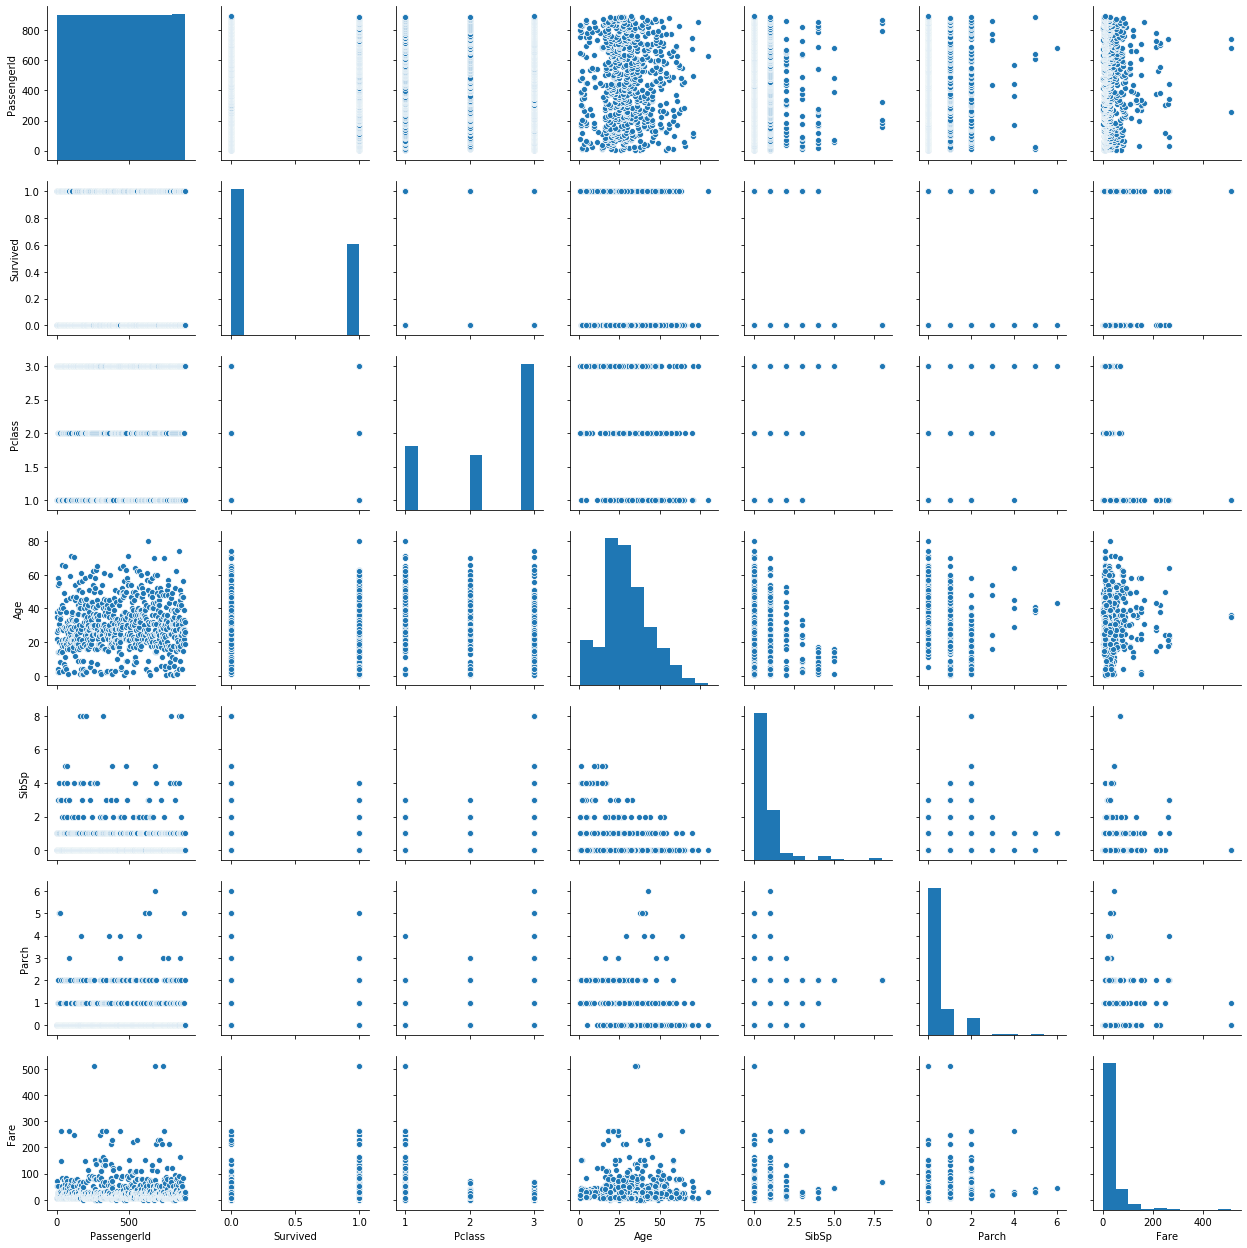

In [21]:
sns.pairplot(data=data)

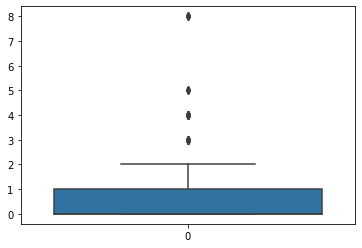

In [22]:
sns.boxplot(data=data['SibSp'])

In [26]:
data[data['SibSp']>=3].index

# 46개 총 891개니까 줄여보자

Int64Index([  7,  16,  24,  27,  50,  59,  63,  68,  71,  85,  88, 119, 159,
            164, 171, 176, 180, 182, 201, 229, 233, 261, 266, 278, 324, 341,
            374, 386, 409, 480, 485, 541, 542, 634, 642, 683, 686, 726, 787,
            792, 813, 819, 824, 846, 850, 863],
           dtype='int64')

In [30]:
# 아예 3이상인것들 다 지워서 RF 모델링만해서 결과를 봐보자

data = data.drop(data[data['SibSp']>=3].index)

In [45]:
data_train = titanic_transform(data)

In [46]:
y_titanic_train = data_train.loc[:,'Survived']
X_titanic_train = data_train.drop('Survived',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, y_titanic_train,
                                                    stratify = y_titanic_train,
                                                    test_size=0.2,
                                                    random_state=11)

In [47]:
X_train.shape

(712, 8)

In [141]:
feature_importance = pd.DataFrame({'feature':X_train.columns, 'importance':rfc_best.feature_importances_})

feature_importance.sort_values(by='importance', ascending=False)

# 상위 6개로 중요도가 90가넘어감

,feature,importance
1,Sex,0.418058
5,Fare,0.144709
0,Pclass,0.137739
2,Age,0.095655
6,Cabin,0.088098
3,SibSp,0.045389
4,Parch,0.035910
7,Embarked,0.034442


In [19]:
# 칼럼이 너무 적을땐 할 필요 없음
# normalize 하면 특징이 사라져서 오히려 안될 수 있음

num_comp = 6 #여러 칼럼중에 최대 몇개까지 쓸 칼럼수
pca = PCA(n_components = num_comp)

train_ext = pca.fit_transform(X_train) 

test_ext = pca.transform(X_test)

min_max_scaler = MinMaxScaler()

train_norm = min_max_scaler.fit_transform(train_ext)
test_norm = min_max_scaler.fit_transform(test_ext)




In [20]:
# knn 모델선언
knn = KNeighborsClassifier()


In [37]:
parameters = {
    'n_neighbors':[1,3,5,7],
    'weights':['uniform','distance'],
    'p':[1,2,3,4]
}
n_iter_search=10
knn_rgs = RandomizedSearchCV(knn, param_distributions=parameters, cv=10,
                            scoring='accuracy', n_jobs=-1,
                            verbose=1,random_state=1234,
                            n_iter=n_iter_search)
knn_rgs.fit(X_train, y_train)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'n_neighbors': [1, 3, 5, 7],
                                        'p': [1, 2, 3, 4],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='2*n_jobs', random_state=1234, refit=True,
                   return_train_score=False, scoring='accuracy', verbose=1)

In [38]:
knn_rgs.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [39]:
parameters = {
    'n_neighbors':[3,5,7],
    'weights':['uniform','distance'],
    'p':[1,2,3]
}
n_iter_search=10
grid_knn_clf = GridSearchCV(knn, param_grid=parameters, cv=10,
                            scoring='accuracy', n_jobs=-1)

grid_knn_clf.fit(X_train, y_train)



C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 7], 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [40]:
# 학습과정이 끝난 애를 기준으로 knn_best에다가 저장함
knn_best = grid_knn_clf.best_estimator_

knn_predictions = knn_best.predict(X_test)
accuracy = accuracy_score(y_test,knn_predictions)
print('knn에서 GridSearchCV로 찾은 결과 : {0:.4f}'.format(accuracy))

knn에서 GridSearchCV로 찾은 결과 : 0.7207


In [184]:
dump(knn_best,'knn_best_pca.pkl')

['knn_best_pca.pkl']

In [35]:
# random forest 모델선언
rfc = RandomForestClassifier()


In [36]:
parameters = {
    'n_estimators':np.arange(10,110,10),
    'max_features':np.arange(1,6),
    'min_samples_split':np.arange(2,5),
    'max_leaf_nodes':np.arange(2,15)
}
n_iter_search=10
rfc_rgs = RandomizedSearchCV(rfc, param_distributions=parameters, cv=7,
                            scoring='accuracy', n_jobs=-1,
                            verbose=1,random_state=1234,
                            n_iter=n_iter_search)
rfc_rgs.fit(X_train, y_train)


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.8s finished
C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [37]:
rfc_rgs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=4, max_leaf_nodes=9,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=70,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [41]:
parameters = {
    'n_estimators':np.arange(60,81),
    'max_features':np.arange(1,6),
    'min_samples_split':np.arange(2,5),
    'max_leaf_nodes':np.arange(5,14)
}
n_iter_search=10
grid_rfc_clf = GridSearchCV(rfc, param_grid=parameters, cv=7,
                            scoring='accuracy', n_jobs=-1)

grid_rfc_clf.fit(X_train, y_train)


C:\dev\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=Fa...
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid=

In [42]:
grid_rfc_clf.best_params_

{'max_features': 3,
 'max_leaf_nodes': 12,
 'min_samples_split': 3,
 'n_estimators': 62}

In [43]:
rfc_best = grid_rfc_clf.best_estimator_

rfc_predictions = rfc_best.predict(X_test)
accuracy = accuracy_score(y_test,rfc_predictions)
print('rfc에서 GridSearchCV로 찾은 결과 : {0:.4f}'.format(accuracy))

rfc에서 GridSearchCV로 찾은 결과 : 0.7988


In [194]:
dump(rfc_best,'rfc_best_pca.pkl')

['rfc_best_pca.pkl']

In [ ]:
svc = SCV()

In [ ]:
parameters = {
    'C':np.arange(1,5),
    'kernel':['rbf','poly','linear'],
    'degree':np.arange(2,5),
    'gamma': [0.01,0.1,1,10]
}

n_iter_search=10
svc_rgs = RandomizedSearchCV(svc, param_distributions=parameters, cv=7,
                            scoring='accuracy', n_jobs=-1,
                            verbose=1,random_state=1234,
                            n_iter=n_iter_search)
svc_rgs.fit(X_train, y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


In [ ]:
svc_rgs.best_estimator_

In [ ]:
parameters = {
    'C':np.arange(2,3),
    'kernel':['poly'],
    'degree':np.arange(2,3),
    'gamma': np.arange(0.09,0.12,0.01)
}
# 가짓수 20개 -> 느려서 조정 3개

n_iter_search=10
grid_svc_clf = GridSearchCV(svc, param_grid=parameters, cv=7,
                            scoring='accuracy', n_jobs=-1)

grid_svc_clf.fit(X_train, y_train)


In [ ]:
# xg boost

In [48]:
data = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')


In [49]:
data_train = titanic_transform(data)



In [50]:
y_titanic_train = data_train.loc[:,'Survived']
X_titanic_train = data_train.drop('Survived',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, y_titanic_train,
                                                    stratify = y_titanic_train,
                                                    test_size=0.2,
                                                    random_state=11)

In [51]:
# xgboost

import xgboost as xgb
from xgboost import XGBClassifier

In [120]:
XGBC = XGBClassifier(verbosity=1, n_jobs=-1)

In [121]:
xgc_param_grid = {
    'n_estimators':np.arange(10,100,10),
    'max_depth':np.arange(2,10),
    'colsample_bytree':np.arange(0,2)    
    
}

In [122]:
n_iter_search=10
xgbc_rgs = RandomizedSearchCV(XGBC, param_distributions=xgc_param_grid, cv=7,
                            scoring='accuracy', n_jobs=-1,
                            verbose=1,random_state=1234,
                            n_iter=n_iter_search)
xgbc_rgs.fit(X_train, y_train)

Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.7s finished


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           learning_rate=0.1, max_delta_step=0,
                                           max_depth=3, min_child_weight=1,
                                           missing=None, n_estimators=100,
                                           n_jobs=-1, nthread=None,
                                           objective='binary:logistic',
                                           random_state=0, reg_alpha=0,
                                           reg_lambda=1, scale_pos_weight=1,
                                           seed=None, silent=None, subsample=1,
                                           verbosity=1),
         

In [127]:
xgbc_rgs.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=80, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [126]:
xgbc_rgs.best_params_

{'n_estimators': 80, 'max_depth': 3, 'colsample_bytree': 1}

In [128]:
xgc_param_grid = {
    'n_estimators':np.arange(70,91),
    'max_depth':np.arange(2,5),
    'colsample_bytree':np.arange(0.1,1,0.1)    
    
}

n_iter_search=10
xgbc_gs = GridSearchCV(XGBC, param_grid=xgc_param_grid, cv=7,verbose=1,
                            scoring='accuracy', n_jobs=-1)

xgbc_gs.fit(X_train, y_train)

Fitting 7 folds for each of 567 candidates, totalling 3969 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 688 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 1688 tasks      | elapsed:   19.8s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:   39.6s
[Parallel(n_jobs=-1)]: Done 3954 out of 3969 | elapsed:   53.8s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 3969 out of 3969 | elapsed:   54.0s finished


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=-1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_...
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=-1,
             param_grid={'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'max_depth': array([2, 3, 4]),
                   

In [129]:
xgbc_gs.best_params_

{'colsample_bytree': 0.8, 'max_depth': 3, 'n_estimators': 70}

In [130]:
xgbc_best = xgbc_gs.best_estimator_

xgbc_predictions = xgbc_best.predict(X_test)
accuracy = accuracy_score(y_test,xgbc_predictions)
print('xgbc에서 GridSearchCV로 찾은 결과 : {0:.4f}'.format(accuracy))

xgbc에서 GridSearchCV로 찾은 결과 : 0.8436


In [81]:
from lightgbm import LGBMClassifier

In [89]:
LGB = LGBMClassifier(random_sate=1234, n_jobs=-1)

In [143]:
lb_param_grid = {
    'n_estimators':np.arange(50,550,50),
    'learning_rate':np.arange(0.5,0,-0.05),
    'colsample_bytree':np.arange(0.1,1,0.1)
}

n_iter_search=10
lgbc_rgs = RandomizedSearchCV(LGB, param_distributions=lb_param_grid, cv=7,
                            scoring='accuracy', n_jobs=-1,
                            verbose=1,random_state=1234,
                            n_iter=n_iter_search)
lgbc_rgs.fit(X_train, y_train)


Fitting 7 folds for each of 10 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    1.2s finished


RandomizedSearchCV(cv=7, error_score='raise-deprecating',
                   estimator=LGBMClassifier(boosting_type='gbdt',
                                            class_weight=None,
                                            colsample_bytree=1.0,
                                            importance_type='split',
                                            learning_rate=0.1, max_depth=-1,
                                            min_child_samples=20,
                                            min_child_weight=0.001,
                                            min_split_gain=0.0,
                                            n_estimators=100, n_jobs=-1,
                                            num_leaves=31, objective=None,
                                            random_sate=1234, random_state=None,...
                   iid='warn', n_iter=10, n_jobs=-1,
                   param_distributions={'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
    

In [144]:
lgbc_rgs.best_params_

{'n_estimators': 50,
 'learning_rate': 0.15000000000000008,
 'colsample_bytree': 0.8}

In [145]:
lb_param_grid = {
    'n_estimators':np.arange(25,126),
    # 러닝레이트는 내려가면서
    'learning_rate':np.arange(0.2,0.02,-0.01),
    'colsample_bytree':np.arange(0.1,1,0.1)
}


n_iter_search=10
lgbc_gs = GridSearchCV(LGB, param_grid=lb_param_grid, cv=7,verbose=1,
                            scoring='accuracy', n_jobs=-1)

lgbc_gs.fit(X_train, y_train)

Fitting 7 folds for each of 16362 candidates, totalling 114534 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 376 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 3376 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 8376 tasks      | elapsed:   21.6s
[Parallel(n_jobs=-1)]: Done 15376 tasks      | elapsed:   40.8s
[Parallel(n_jobs=-1)]: Done 24376 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 35376 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 48376 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 63376 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 80376 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 99376 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 114534 out of 114534 | elapsed:  6.9min finished


GridSearchCV(cv=7, error_score='raise-deprecating',
             estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None,
                                      colsample_bytree=1.0,
                                      importance_type='split',
                                      learning_rate=0.1, max_depth=-1,
                                      min_child_samples=20,
                                      min_child_weight=0.001,
                                      min_split_gain=0.0, n_estimators=100,
                                      n_jobs=-1, num_leaves=31, objective=None,
                                      random_sate=1234, random_state=None,
                                      reg_al...
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  

In [146]:
lgbc_gs.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.0799999999999999,
 'n_estimators': 70}

In [147]:
lgbc_best = lgbc_gs.best_estimator_

lgbc_predictions = lgbc_best.predict(X_test)
accuracy = accuracy_score(y_test,lgbc_predictions)
print('lgbm에서 GridSearchCV로 찾은 결과 : {0:.4f}'.format(accuracy))

lgbm에서 GridSearchCV로 찾은 결과 : 0.8101


In [137]:
dump(rfc_best,'rfc_best_model.pkl')

['rfc_best_model.pkl']

In [138]:
# rfc best
rfc_predictions = rfc_best.predict(X_test)
accuracy = accuracy_score(y_test,rfc_predictions)
print('rfc에서 GridSearchCV로 찾은 결과 : {0:.4f}'.format(accuracy))

rfc에서 GridSearchCV로 찾은 결과 : 0.8603


In [139]:
rfc_best

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features=3, max_leaf_nodes=12,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=62,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
# voting

In [148]:
eclf = VotingClassifier(estimators= [('rfc',rfc_best), ('xgb',xgbc_best), ('lgb',lgbc_best)],
                       voting='hard')
# voting = 'hard' (voting별로 같은 가중치)

eclf.fit(X_train, y_train)
eclf_pred = eclf.predict(X_test)
accuracy = accuracy_score(y_test, eclf_pred)
print('Hard Voting 에서로 찾은 결과 : {0:.4f}'.format(accuracy))

Hard Voting 에서로 찾은 결과 : 0.8268


In [ ]:
# rfc혼자가 젤 높네여
# 하나가 바뀐다고 해도 값이 hardvoting에서 값이 달라지진 않음? 정확도 측면에서

In [3]:
data = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data.isnull().sum() # null값의 갯수

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

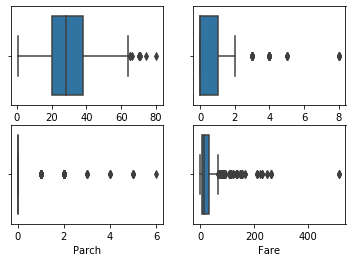

In [9]:
fig, ax = plt.subplots(2,2)

sns.boxplot(data['Age'], ax=ax[0,0])
sns.boxplot(data['SibSp'], ax=ax[0,1])
sns.boxplot(data['Parch'], ax=ax[1,0])
sns.boxplot(data['Fare'], ax=ax[1,1])

In [11]:
from collections import Counter

In [16]:
def detect_outliers(df, n, features) :
    outlier_indices = []
    for col in features :
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        # inter quartile range
        IQR = Q3 - Q1
        
        outlier_step = 1.5* IQR
        
        # 아래나 위로 튀는 이상치에 대한 index 값을 가져옴
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        
        outlier_indices.extend(outlier_list_col)
    # outlier couting
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)
    
    return multiple_outliers

In [17]:
# 여러개에서 이상치를 발견한 데이터에 대해서 데이터를 잘라버리는 거

Outliers_to_drop = detect_outliers(data, 2, ['Age','SibSp','Parch','Fare'])

In [18]:
Outliers_to_drop

[27, 88, 159, 180, 201, 324, 341, 792, 846, 863]

In [20]:
data.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [21]:
data = data.drop(Outliers_to_drop, axis=0).reset_index(drop=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 881 entries, 0 to 880
Data columns (total 12 columns):
PassengerId    881 non-null int64
Survived       881 non-null int64
Pclass         881 non-null int64
Name           881 non-null object
Sex            881 non-null object
Age            711 non-null float64
SibSp          881 non-null int64
Parch          881 non-null int64
Ticket         881 non-null object
Fare           881 non-null float64
Cabin          201 non-null object
Embarked       879 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 82.7+ KB


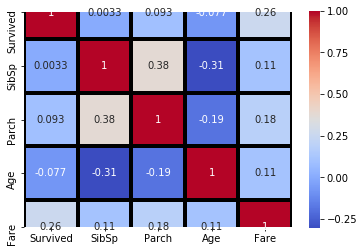

In [22]:
sns.heatmap(data[['Survived','SibSp','Parch','Age','Fare']].corr(),annot=True,cmap='coolwarm',
           linewidths=3, linecolor='black',fmt='.2g',square=True)

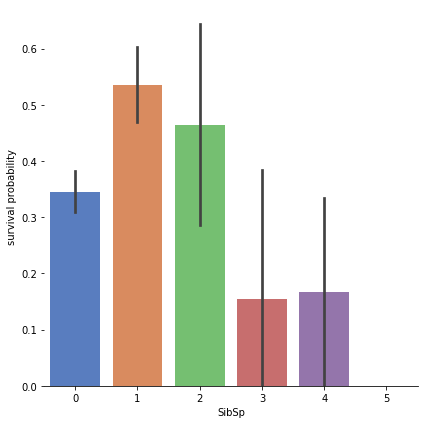

In [27]:
g = sns.catplot(x='SibSp',y='Survived',data=data,kind='bar', height=6, palette='muted')
g.despine(left=True)
g = g.set_ylabels('survival probability')
# 검은색라인은 오차막대이다

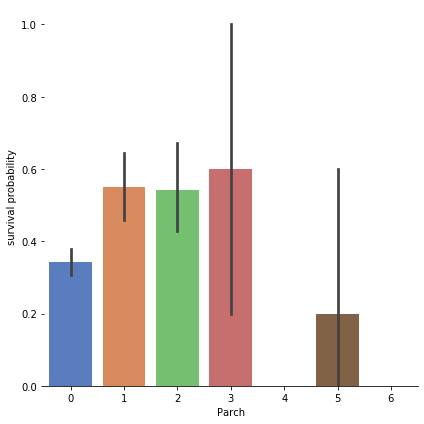

In [28]:
g = sns.catplot(x='Parch',y='Survived',data=data,kind='bar', height=6, palette='muted')
g.despine(left=True)
g = g.set_ylabels('survival probability')

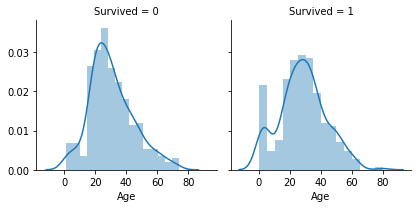

In [29]:
ax = sns.FacetGrid(data, col='Survived')
ax = ax.map(sns.distplot,'Age')

# 생존 비율에 대해서 아이들쪽은 많이 살았고, 장년층에 대해서는 많이 죽었다.

In [30]:
data.loc[:,['Survived','Age']].corr()

# 실질적으로는 각각에 데이터를 target과에 대해서 비교해봐야됨

# 상황봐서 나이로 보면 카테고리로 나눠서하면 분류확률이 높아질 수 있다.

,Survived,Age
Survived,1.000000,-0.076867
Age,-0.076867,1.000000


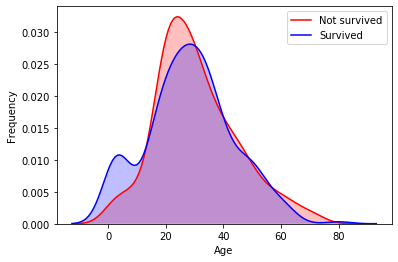

In [31]:
g = sns.kdeplot(data['Age'][(data['Survived']==0) & (data['Age'].notnull())],
               color='Red', shade=True)
g = sns.kdeplot(data['Age'][(data['Survived']==1) & (data['Age'].notnull())],
               color='Blue', shade=True)
g.set_xlabel('Age')
g.set_ylabel('Frequency')
g = g.legend(['Not survived','Survived'])

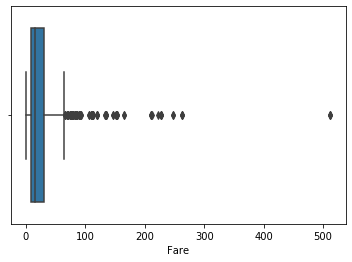

In [34]:
sns.boxplot(data['Fare'])

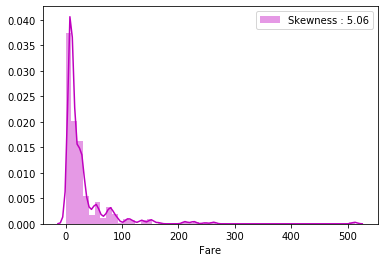

In [39]:
ax = sns.distplot(data['Fare'], color='m',label='Skewness : %.2f'%(data['Fare'].skew()))
ax = ax.legend(loc='best')

In [ ]:
# 왼쪽에 데이터가 많은경우 : root, log10
# 오른쪽에 데이터가 많은 경우 : 제곱, log2

In [40]:
data['Fare'] = data['Fare'].apply(lambda x : np.log(x) if x>0 else 0)

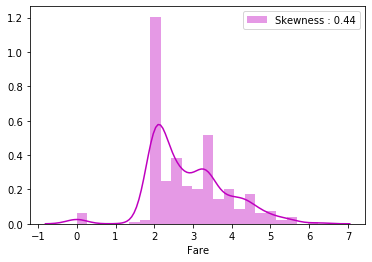

In [41]:
ax = sns.distplot(data['Fare'], color='m',label='Skewness : %.2f'%(data['Fare'].skew()))
ax = ax.legend(loc='best')

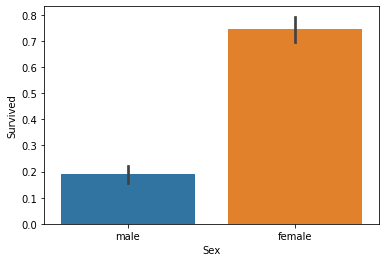

In [42]:
sns.barplot(x=data['Sex'], y=data['Survived'])

In [43]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.747573
male,0.190559


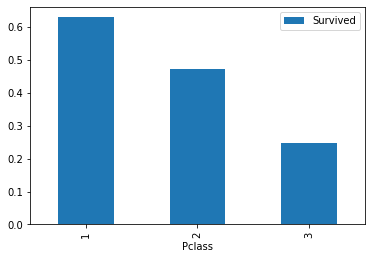

In [45]:
data[['Pclass','Survived']].groupby(['Pclass'],
                                    as_index=True).mean().sort_values(by='Survived',
                                                                     ascending = False).plot.bar()

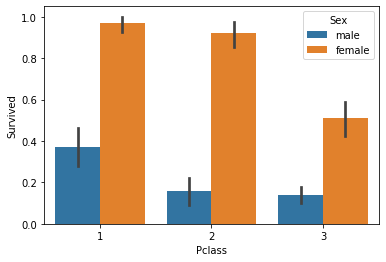

In [46]:
# 종류별로 나눠서 확인할 수 있다.
sns.barplot(x=data['Pclass'],y=data['Survived'],hue='Sex',data=data)

In [47]:
print("Embarked 빠진 데이터 수 : {0}".format(data['Embarked'].isnull().sum()))

Embarked 빠진 데이터 수 : 2


In [48]:
data['Embarked'].value_counts()

S    634
C    168
Q     77
Name: Embarked, dtype: int64

In [49]:
# 가장 많이 나타난거에다가 채워버림 비어있는게 2개밖에 없으니

data['Embarked'] = data['Embarked'].fillna('S')

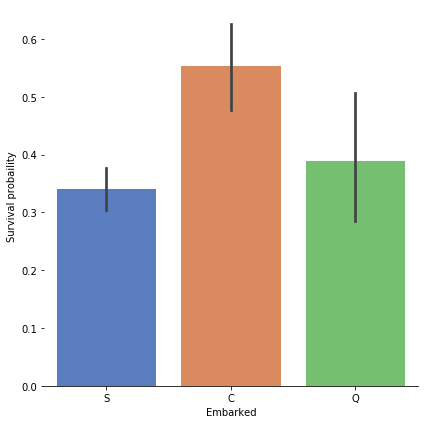

In [50]:
g = sns.catplot(x='Embarked',y='Survived', data=data,
               height=6, kind='bar',palette='muted').despine(left=True)
g.set_ylabels('Survival probaility')

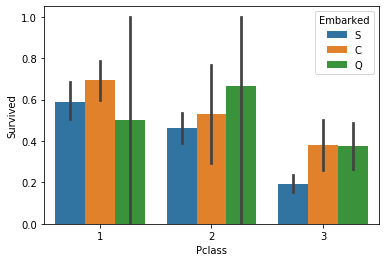

In [51]:
sns.barplot(x=data['Pclass'],y=data['Survived'],hue='Embarked',data=data)

In [ ]:
# na 값 채우기

In [52]:
data['Age'].isnull().sum()

170

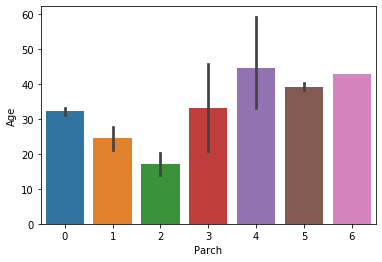

In [58]:
sns.barplot(y='Age',x='Parch',data=data)

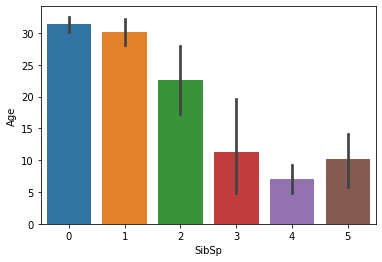

In [55]:
sns.barplot(y='Age',x='SibSp',data=data)

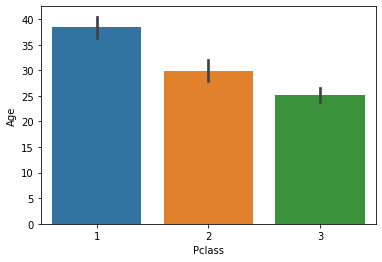

In [61]:
sns.barplot(y='Age',x='Pclass',data=data)

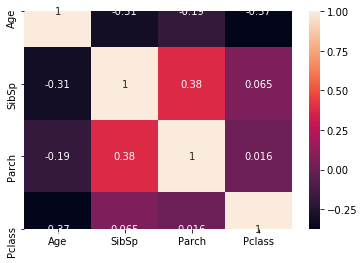

In [62]:
flg, ax = plt.subplots(nrows=1,ncols=1)
sns.heatmap(data.loc[:,['Age','Sex','SibSp','Parch','Pclass']].corr(),annot=True,ax=ax)

# 유사한 거에 대해서 평균을 잡거나
# 유사한것에 대해서 데이터를 가지고 머신러닝해서 age를 채워넣음

In [65]:
index_NaN_age = list(data[data['Age'].isnull()].index)

Age_idx = data.columns.get_loc('Age')
SibSp_idx = data.columns.get_loc('SibSp')
Parch_idx = data.columns.get_loc('Parch')
Pclass_idx = data.columns.get_loc('Pclass')

for i in index_NaN_age :
    age_med = data['Age'].median()
    age_pred = data['Age'][((data['SibSp'] == data.iloc[i]['SibSp']) 
                           & (data['Parch'] == data.iloc[i]['Parch'])
                           & (data['Pclass'] == data.iloc[i]['Pclass']))].median()
    if not np.isnan(age_pred) :
        data.iat[i, age_idx] = age_pred
    else :
        data.iat[i,age_idx] = age_med

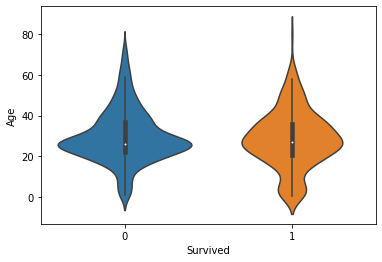

In [66]:
sns.violinplot(x='Survived',y='Age',data=data, kind='violin')

In [69]:
data['Cabin'].describe()

count     201
unique    147
top        G6
freq        4
Name: Cabin, dtype: object

In [70]:
data['Cabin'] = data['Cabin'].fillna('X')
data['Cabin'] = data['Cabin'].apply(lambda x : str(x)[:1])

data['Cabin'].isnull().sum()

0

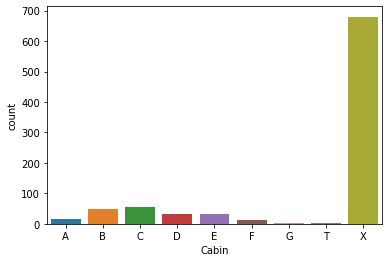

In [71]:
sns.countplot(data['Cabin'],order=['A','B','C','D','E','F','G','T','X'])

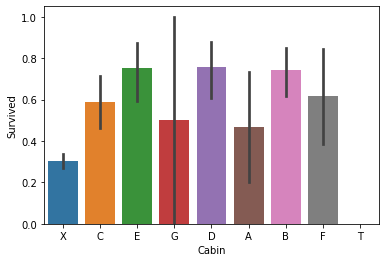

In [73]:
sns.barplot(x='Cabin',y='Survived',data=data)

In [76]:
data['Fsize'] = data['SibSp'] + data['Parch'] +1

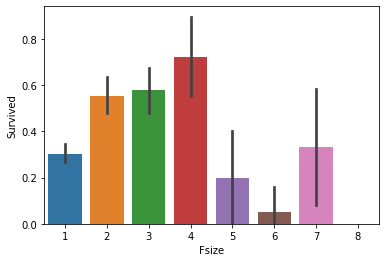

In [78]:
sns.barplot(x='Fsize',y='Survived',data=data)

In [79]:
# Fsize 값으로 원핫인코딩함
data['Single'] = data['Fsize'].apply(lambda x : 1 if x==1 else 0)
data['SmallF'] = data['Fsize'].apply(lambda x : 1 if x==2 else 0)
data['MedF'] = data['Fsize'].apply(lambda x : 1 if 3<=x<=4 else 0)
data['LargeF'] = data['Fsize'].apply(lambda x : 1 if x>=5 else 0)

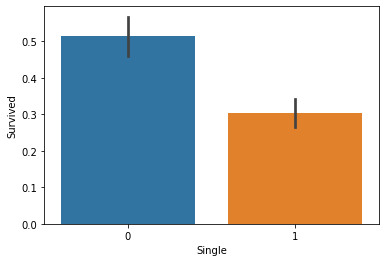

In [80]:
sns.barplot(x=data['Single'],y=data['Survived'])

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [82]:
def titanic_fillna(df) :
    df.Age.fillna(data['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return(df)

In [83]:
def drop_feature(df) :
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

In [84]:
# 전처리 기본 2 : lambda 이용해서 Cabin의 값 1글자만 사용
def format_features(df) :
    
    features = ['Cabin','Sex','Embarked']
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(df.loc[:,feature])
        df.loc[:,feature] = le.transform(df.loc[:,feature])
        
    # Scalar 사용할 수 있음
        
    return(df)

In [89]:
def titanic_transform(df) :
    df = titanic_fillna(df)
    df = drop_feature(df)
    df = format_features(df)
    return(df)

In [90]:
data_train = titanic_transform(data)

In [91]:
y_titanic_train = data_train.loc[:,'Survived']
X_titanic_train = data_train.drop('Survived',axis=1)

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_train, y_titanic_train,
                                                    stratify = y_titanic_train,
                                                    test_size=0.2,
                                                    random_state=11)

In [99]:
from sklearn.model_selection import KFold

In [100]:
kfold = KFold(n_splits=5,random_state=0,shuffle=True)

In [101]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
# rf, xgb, lgb

In [116]:
# rfc
rfc = RandomForestClassifier(n_jobs=-1)

In [125]:

parameters = {
    'n_estimators':np.arange(50,600,50),
    'max_features':np.arange(1,7),
    'min_samples_split':np.arange(23),
    'max_leaf_nodes':np.arange(2,15)
}

n_iter_search=10
rfc_rgs = RandomizedSearchCV(rfc, param_distributions=parameters, cv=kfold,
                            scoring='accuracy', n_jobs=-1,
                            verbose=1,random_state=1234,
                            n_iter=n_iter_search)
rfc_rgs.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    1.5s finished


RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_lea...
                                                    warm_start=False),
   

In [128]:
rfc_rgs.best_params_

{'n_estimators': 90,
 'min_samples_split': 4,
 'max_leaf_nodes': 6,
 'max_features': 4}

In [133]:
parameters = {
    'n_estimators':np.arange(490,510),
    'max_features':np.arange(5,7),
    'min_samples_split':np.arange(2,3),
    'max_leaf_nodes':np.arange(2,13)
}

n_iter_search=10
grid_rfc_clf = GridSearchCV(rfc, param_grid=parameters, cv=kfold,scoring='accuracy', n_jobs=-1)

grid_rfc_clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,...
                                              warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_features': array([5, 6]),
                         'max_leaf_nodes': array([ 2,  3,  4,  5,  6,  7,  8,  9,

In [134]:
grid_rfc_clf.best_params_

{'max_features': 5,
 'max_leaf_nodes': 8,
 'min_samples_split': 2,
 'n_estimators': 501}

In [135]:
rfc_best = grid_rfc_clf.best_estimator_
rfc_predictions = rfc_best.predict(X_test)
accuracy = accuracy_score(y_test,rfc_predictions)
print('rfc에서 GridSearchCV로 찾은 결과 : {0:.4f}'.format(accuracy))

rfc에서 GridSearchCV로 찾은 결과 : 0.7684


In [ ]:
# xgboost

In [123]:
import xgboost as xgb
from xgboost import XGBClassifier

In [124]:
XGBC = XGBClassifier(verbosity=1, n_jobs=-1)

In [ ]:
xgc_param_grid = {
    'n_estimators':np.arange(10,100,10),
    'max_depth':np.arange(2,10),
    'colsample_bytree':np.arange(0,2)    
    
}

n_iter_search=10
xgbc_rgs = RandomizedSearchCV(XGBC, param_distributions=xgc_param_grid, cv=7,
                            scoring='accuracy', n_jobs=-1,
                            verbose=1,random_state=1234,
                            n_iter=n_iter_search)
xgbc_rgs.fit(X_train, y_train)

In [ ]:
xgbc_rgs.best_params_

In [ ]:
xgc_param_grid = {
    'n_estimators':np.arange(70,91),
    'max_depth':np.arange(2,5),
    'colsample_bytree':np.arange(0.1,1,0.1)    
    
}

n_iter_search=10
xgbc_gs = GridSearchCV(XGBC, param_grid=xgc_param_grid, cv=7,verbose=1,
                            scoring='accuracy', n_jobs=-1)

xgbc_gs.fit(X_train, y_train)

In [ ]:
xgbc_gs.best_params_


In [ ]:
xgbc_best = xgbc_gs.best_estimator_

xgbc_predictions = xgbc_best.predict(X_test)
accuracy = accuracy_score(y_test,xgbc_predictions)
print('xgbc에서 GridSearchCV로 찾은 결과 : {0:.4f}'.format(accuracy))

In [ ]:
# lightgboost

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
LGB = LGBMClassifier(random_sate=1234, n_jobs=-1)

In [ ]:
lb_param_grid = {
    'n_estimators':np.arange(50,550,50),
    'learning_rate':np.arange(0.5,0,-0.05),
    'colsample_bytree':np.arange(0.1,1,0.1)
}

n_iter_search=10
lgbc_rgs = RandomizedSearchCV(LGB, param_distributions=lb_param_grid, cv=7,
                            scoring='accuracy', n_jobs=-1,
                            verbose=1,random_state=1234,
                            n_iter=n_iter_search)
lgbc_rgs.fit(X_train, y_train)

In [ ]:
lgbc_rgs.best_params_

In [ ]:
lb_param_grid = {
    'n_estimators':np.arange(25,126),
    # 러닝레이트는 내려가면서
    'learning_rate':np.arange(0.2,0.02,-0.01),
    'colsample_bytree':np.arange(0.1,1,0.1)
}


n_iter_search=10
lgbc_gs = GridSearchCV(LGB, param_grid=lb_param_grid, cv=7,verbose=1,
                            scoring='accuracy', n_jobs=-1)

lgbc_gs.fit(X_train, y_train)

In [ ]:
lgbc_gs.best_params_

In [ ]:
lgbc_best = lgbc_gs.best_estimator_

lgbc_predictions = lgbc_best.predict(X_test)
accuracy = accuracy_score(y_test,lgbc_predictions)
print('lgbm에서 GridSearchCV로 찾은 결과 : {0:.4f}'.format(accuracy))